In [18]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
#from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.applications import VGG19
#input details
from tensorflow.keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
#layer and regularization
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization

In [10]:
datagen = ImageDataGenerator()

In [11]:
# define classes name
class_names = ['daisy','dandelion','roses','sunflowers','tulips']

In [12]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="C:/Users/root/flower_data/data-split/train/", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="binary", 
)

Found 1270 images belonging to 5 classes.


In [13]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="C:/Users/root/flower_data/data-split/val/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 362 images belonging to 5 classes.


In [14]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="C:/Users/root/flower_data/data-split/test/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 184 images belonging to 5 classes.


In [7]:
# VGG16 was designed to work on 224 x 224 pixel input images sizes
img_rows = 224
img_cols = 224 

#Loads the VGG16 model 
vgg16 = VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 37s 1us/step


In [8]:


# Let's print our layers (Default= False)

for (i,layer) in enumerate(vgg16.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)



0 InputLayer True
1 Conv2D True
2 Conv2D True
3 MaxPooling2D True
4 Conv2D True
5 Conv2D True
6 MaxPooling2D True
7 Conv2D True
8 Conv2D True
9 Conv2D True
10 MaxPooling2D True
11 Conv2D True
12 Conv2D True
13 Conv2D True
14 MaxPooling2D True
15 Conv2D True
16 Conv2D True
17 Conv2D True
18 MaxPooling2D True


In [15]:
Image_size=224,224,3
pre_trained_model=keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=Image_size)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


In [16]:
# Freeze the convolutional layers to prevent them from being trained
for layer in pre_trained_model.layers:
    layer.trainable = False



In [19]:
x= pre_trained_model.output
x= Flatten()(x)
x = Dense(2048, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x) 

In [20]:
custom_model= Model(inputs=pre_trained_model.input, outputs= output)



In [25]:
#custom_model.summary()

In [26]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [27]:
# launch the training
model_history = trainModel(model = custom_model, epochs = 10, optimizer = "Adam")

Epoch 1/10


C:\Users\root\anaconda3\envs\DL\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.4461 - loss: 2.3546 - val_accuracy: 0.5304 - val_loss: 6.9912
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 122s 3s/step - accuracy: 0.7130 - loss: 1.0955 - val_accuracy: 0.4613 - val_loss: 6.1899
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.7754 - loss: 0.7293 - val_accuracy: 0.6630 - val_loss: 1.8695
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.7980 - loss: 0.6025 - val_accuracy: 0.7099 - val_loss: 1.3183
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.8298 - loss: 0.5297 - val_accuracy: 0.7431 - val_loss: 1.0230
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.8476 - loss: 0.5092 - val_accuracy: 0.7652 - val_loss: 1.0260
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.8747 - loss: 0.3421 - val_accuracy: 0.7597 - val_loss: 0.8547
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 120s 3s/step - accuracy: 0.9075 - loss: 0.2895 - val_accuracy: 0.7652 - val_loss: 1.

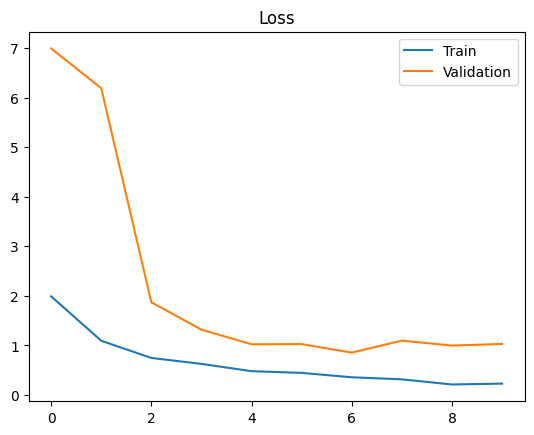

In [28]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

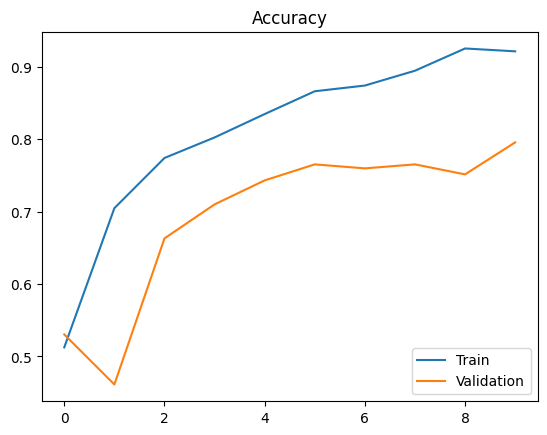

In [29]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [32]:
test_loss, test_acc = custom_model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.7598 - loss: 0.8726
The test loss is:  0.9840310215950012
The best accuracy is:  73.36956262588501


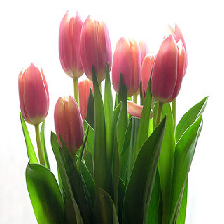

In [33]:
img = tf.keras.preprocessing.image.load_img('C:/Users/root/flower_data/data-split/test/tulip/112428665_d8f3632f36_n.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [34]:
# generate predictions for samples
predictions = custom_model.predict(img_array)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[1.9587496e-01 8.0058175e-01 6.1929889e-04 6.0449902e-04 2.3194870e-03]]


In [35]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[1]


In [36]:
# transform classes number into classes name
class_names[class_id.item()]

'dandelion'

In [38]:
custom_model.save('my_flower_InceptionV3model.keras')